In [5]:
import numpy as np
import random, math
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.lines as mlines
from matplotlib.ticker import FixedLocator

plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 8

In [6]:
class buffon_exp:
    def __init__(self):
        # Parameter initialization
        self.l = 0.33 # needle length
        self.d = 1.0 # plank width
        self.r = self.l / self.d 
        self.N = 1000 # Number of needle throws
        self.start = self.N + 1 # number of first plank-hitting needle (
                                #(initialized to a value bigger than self.N)
        self.nx = 10 # Number of planks
        self.ny = 5 # self.d * self.ny = height of a plank
        self.Lx = [i * self.d for i in range(self.nx)]
        self.data = [] # Store whether a throw is hitting two planks or not
        self.C = [] # Store thrown needle positions. A needle configuration
                    # is completely determined by thre triplet (x, y, phi)
                    # x, y = needle center position and phi = needle angle

    def add_needle(self):
        # Write a routine randomly throwing a needle and 
        # checking whether the throw hit two planks
        
        #initialize coordinates
        x,y,phi = random.uniform(0.0, 10.0*self.d), random.uniform(0.0, 1.0*self.ny), random.uniform(0.0, math.pi/2)
        self.C.append((x,y,phi))
        #distance between needle center and nearest plank
        nearest_plank = np.round(x)
        dist = abs(x-nearest_plank)*1.0
        #check if needle on two planks
        is_two_planks = dist<(self.l/2.0)*math.sin(phi)
        self.data.append(is_two_planks)
        self.start = 1
        
    def estimate_pi(self, n_throws):
        # Write a routine to estimate pi from the first `n_throws` samples
        if n_throws == 0:
            return 0
        mean = 0
        for i in range(n_throws):
            mean+= 1 if self.data[i] else 0
        mean = (mean)/(n_throws)
        if mean == 0:
            return 0
        pi = (2.0*self.l)/(mean*self.d)
        return pi
    
    def generate_throws(self):
        # Write a routine to generate self.N needle throw and compute the estimated pi
        for i in range(self.N):
            self.add_needle()
        print("Generating needle throws")
        print("hat_pi = ", self.estimate_pi(self.N))
        
    def plot_error(self, **kwargs):
        # Complete the routine to plot the error between the estimated pi and its true value.
        if 'fig' in kwargs:
            fig_err = kwargs['fig']
        else:
            fig_err = plt.fig(figsize=(9,5))
        if 'color' in kwargs:
            color =  kwargs['color']
        else:
            color = random.choice(['k','b','y','r','chartreuse','magenta'])
        if 'alpha' in kwargs:
            alpha = kwargs['alpha']
        else:
            alpha = 1.0
        ax = fig_err.gca()
        estimations=[self.estimate_pi(n) for n in range(1,self.N +1)]
        pi=math.pi
        erreurs=[abs(estimee-pi) for estimee in estimations]
        ax.plot(np.array([float(len(self.data[:(i)])) for i in range(self.N)]), 
                np.array([self.estimate_pi(i)-math.pi for i in range(self.N)]),
                 lw=1.5, c = color, alpha = alpha)
        
    def set_fig(self):
        self.fig, self.axes=plt.subplots(1, 2, figsize = (9, 5))
        for i in range(self.nx+1):
            self.axes[0].axvline(x = i * self.d, c = 'k')
        self.axes[0].set_xticks([]);self.axes[0].xaxis.set_ticklabels([])
        self.axes[0].set_yticks([]);self.axes[0].yaxis.set_ticklabels([])
        self.axes[0].set_xlim(-self.d/2.0,self.nx * self.d + self.d/2.0)
        self.axes[0].set_ylim(-self.d/2.0, self.ny * self.d + self.d/2.0)
        self.axes[1].axhline(y=math.pi)
        self.axes[1].set_ylabel(r'$\hat{\pi}$', fontsize=10)
        self.axes[1].set_xlabel(r'$N$', fontsize=10)
        self.axes[1].set_xlim(0,self.N)
        self.axes[1].set_ylim(2.5,4)
    
    def plot_total(self):
        self.set_fig()
        for throw in range(self.N):                
            x, y, phi = self.C[throw]
            if self.data[throw] == 1:
                line = mlines.Line2D([x + self.l / 2.0 * math.cos(phi), x - self.l / 2.0 *math.cos(phi)], 
                                     [y + self.l / 2.0 * math.sin(phi), y - self.l / 2.0 *math.sin(phi)], 
                                     axes = self.axes[0], lw=2., c = 'r')
            else:
                line = mlines.Line2D([x + self.l / 2.0 * math.cos(phi), x - self.l / 2.0 *math.cos(phi)], 
                                     [y + self.l / 2.0 * math.sin(phi), y - self.l / 2.0 *math.sin(phi)], 
                                     axes = self.axes[0], lw=2., alpha = 0.1, c = 'k')
            self.axes[0].add_line(line)
        if self.start < self.N:
            self.axes[1].plot(np.array([float(len(self.data[:(i)])) for i in range(self.N)]), 
                              np.array([self.estimate_pi(i) for i in range(self.N)]),
                              lw=1.5, c = 'k')    
        plt.show()
        #print([self.estimate_pi(i)-math.pi for i in range(self.N)])

Generating needle throws
hat_pi =  3.2038834951456314


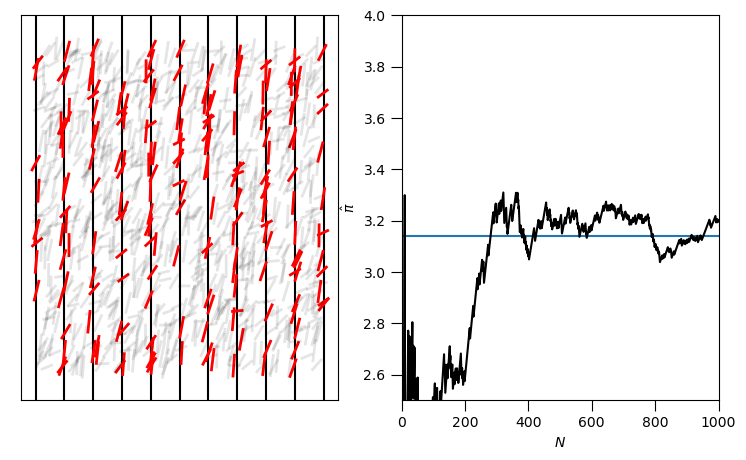

In [7]:
run_buffon = buffon_exp()
run_buffon.generate_throws()
run_buffon.plot_total()

Generating needle throws
hat_pi =  2.986425339366516
Generating needle throws
hat_pi =  3.36734693877551
Generating needle throws
hat_pi =  3.0
Generating needle throws
hat_pi =  3.127962085308057
Generating needle throws
hat_pi =  3.5106382978723407
Generating needle throws
hat_pi =  3.2038834951456314
Generating needle throws
hat_pi =  3.1730769230769234
Generating needle throws
hat_pi =  3.098591549295775
Generating needle throws
hat_pi =  3.1730769230769234
Generating needle throws
hat_pi =  3.3


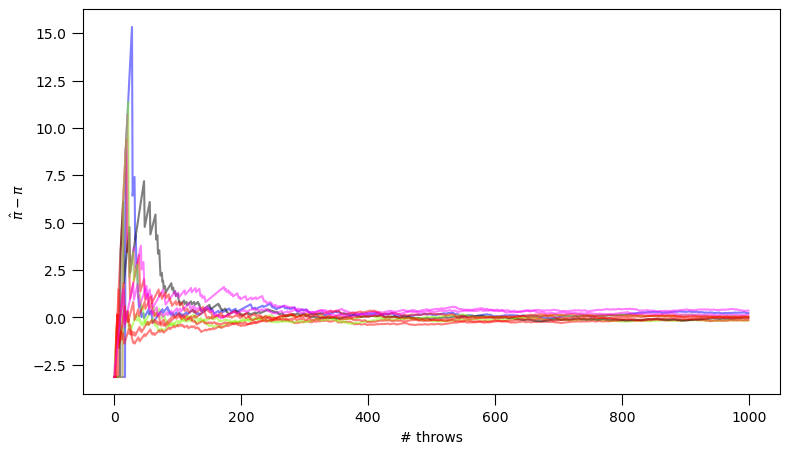

In [8]:
run_buffon = buffon_exp()
fig=plt.figure(figsize=(9,5))
for iter_experiment in range(10):
    run_buffon.generate_throws()
    run_buffon.plot_error(fig=fig, alpha = 0.5)
    run_buffon.C=[]
    run_buffon.data=[]
plt.xlabel('# throws')
plt.ylabel(r'$\hat{\pi}-\pi$')
plt.show()